In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
import torch
import datasets
import sys

In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 사용가능한 dataset list 불러오기
dataset_list=datasets.list_datasets()

# dataset list 확인
for datas in dataset_list:
  if 'ko' in datas:
    print(datas)

kor_3i4k
kor_hate
kor_ner
kor_nli
kor_nlu
kor_qpair
kor_sae
kor_sarcasm
squad_kor_v1
squad_kor_v2
AI-it/korean-hate-speech
Jack0508/TED2020_kor
Jack0508/TED2020vi_kor
Jack0508/vi-ko-TED-txt
KETI-AIR/kor_corpora
KETI-AIR/korquad
NikolajW/NPS_nonNormalized-Cased
Sabokou/qg_squad_modified
Sabokou/qg_squad_modified_dev
Sakonii/nepalitext-language-model-dataset
abwicke/koplo
cyko/books
dennlinger/klexikon
huggingartists/aikko
huggingartists/boris-grebenshikov
huggingartists/kojey-radical
huggingartists/krept-and-konan-bugzy-malone-sl-morisson-abra-cadabra-rv-and-snap-capone
huggingartists/lyapis-trubetskoy
huggingartists/max-korzh
imvladikon/hebrew_speech_coursera
imvladikon/hebrew_speech_kan
imvladikon/knesset_meetings_corpus
kresnik/zeroth_korean
larcane/ko-WIT
mariosasko/dummy_test
mariosasko/test_multi_dir_dataset
msarmi9/korean-english-multitarget-ted-talks-task
nykodmar/cs_corpora_parliament_processed
poperson1205/mrtydi-v1.1-korean-fixed
roskoN/dailydialog
roskoN/dstc8-reddit-corpus


In [ ]:
# nsmc 데이터 로드
dataset=datasets.load_dataset('nsmc') #nsmc, hate, sarcasm

#데이터셋 구조 확인
print(dataset)
# train과 test가 나눠져있음

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})


In [ ]:
import pandas as pd

In [ ]:
# 필요한 데이터만 documanet와 label 정보만 pandas 라이브러리 DataFrame 형식으로 변환
train_data=pd.DataFrame({'document':dataset['train']['document'],'label':dataset['train']['label']})
test_data=pd.DataFrame({'document':dataset['test']['document'],'label':dataset['test']['label']})

In [ ]:
# 데이터셋 개수 확인
print('학습데이터셋:{}'.format(len(train_data)))
print('테스트데이터셋:{}'.format(len(test_data)))

학습데이터셋:150000
테스트데이터셋:50000


In [ ]:
# 데이터셋 내용 확인
train_data[:5]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_data[:5]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
# 데이터 중복을 제외한 개수 확인
# 왜 중복을 제거해야 하는지? 똑같은 리뷰를 쓴 사용자가 있지 않을까? (ex 재밌다 재밌네요 등)
print('학습데이터:',train_data['document'].nunique(),'라벨:',train_data['label'].nunique())
print('테스트데이터:',test_data['document'].nunique(),'라벨:',test_data['label'].nunique())

# 중복 데이터 제거
train_data.drop_duplicates(subset=['document'],inplace=True)
test_data.drop_duplicates(subset=['document'],inplace=True)

# 데이터셋 개수 확인
print('중복 제거 후 학습데이터셋:{}'.format(len(train_data)))
print('중복 제거 후 테스트데이터셋:{}'.format(len(test_data)))

학습데이터: 146183 라벨: 2
테스트데이터: 49158 라벨: 2
중복 제거 후 학습데이터셋:146183
중복 제거 후 테스트데이터셋:49158


In [ ]:
import numpy as np

In [ ]:
train_data['document'].replace('',np.nan, inplace=True)
test_data['document'].replace('',np.nan, inplace=True)
train_data=train_data.dropna(how='any')
test_data=test_data.dropna(how='any')

print('null 제거 후 학습 데이터셋{}'.format(len(train_data)))
print('null 제거 후 테스트 데이터셋{}'.format(len(test_data)))

null 제거 후 학습 데이터셋146182
null 제거 후 테스트 데이터셋49157


학습 문장 최대 길이: 146
학습 문장 평균 길이: 35.981338331668745


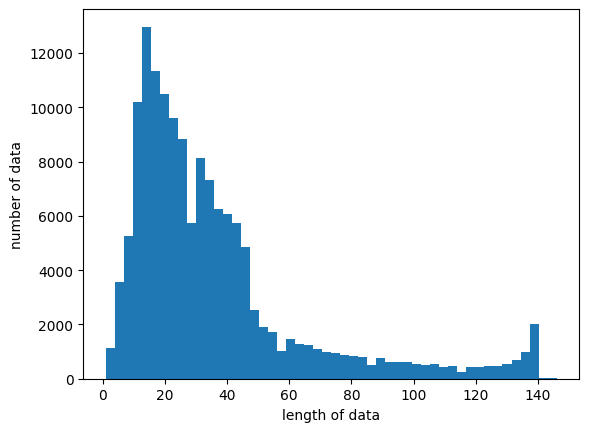

In [ ]:
from matplotlib import pyplot as plt

# 학습 리뷰 길이조사
print('학습 문장 최대 길이:',max(len(i) for i in train_data['document']))
print('학습 문장 평균 길이:', sum(map(len, train_data['document']))/len(train_data['document']))

plt.hist([len(s) for s in train_data['document']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
# store the model we want to use
from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME='bert-base-multilingual-cased'
tokenizer=AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
tokenized_trian_sentences=tokenizer(
    list(train_data['document']),
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True,
)

In [ ]:
tokenized_test_sentences=tokenizer(
    list(test_data['document']),
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True,
)

In [ ]:
train_label=train_data['label'].values
test_label=test_data['label'].values

In [ ]:
# 실제 모델에 입력하기 위한 구조적인 모델
class SingleSentDatasets(torch.utils.data.Dataset):
  def __init__(self,encodings, labels):
    self.encodings=encodings
    self.labels=labels

    # 학습이 진행되면 매 step이 진행될 것이고 batch 단위로 진행될텐데, 그 step에 맞는 데이터를 가져오는 것이 getitem
    def __getitem__(self, idx):
      item={key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
      item['labels']=torch.tensor(self.labels[idx])
      return item

    def __len__(self):
      return len(self.labels)


In [ ]:
train_dataset=SingleSentDatasets(tokenized_trian_sentences, train_label)
test_dataset=SingleSentDatasets(tokenized_test_sentences, test_label)

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
# 문장 분류를 위해선 BERT 위에 classification을 위한 head를 부착해야 한다
# 해당 부분을 transformers에서는 라이브러리 하나마 호출하면 된다

In [ ]:
!pip install transformers==4.30

In [ ]:
training_args=TrainingArguments(
    output_dir='./results',
    max_steps=1,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    save_steps=500,
    save_total_limit=2,
)

In [ ]:
model=BertForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(device)

trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


TypeError: object of type 'SingleSentDatasets' has no len()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
  labels=pred.label_ids
  preds=pred.predictions.argmax(-1)
  precision,recall,f1,_=precision_recall_fscore_support(labels,preds,average=)
  acc=accuracy_score(labels, preds)
  return {
      'accurcay':acc,
      'f1':f1,
      'precision':precision,
      'recall':recall
  }

In [ ]:
trainer=Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.evaluate(eval_dataset=test_dataset)

In [ ]:
def sentences_predict(sent):
  model.eval()
  tokenized_test=tokenizer(
      sent,
      return_tensors='pt',
      truncation=True,
      add_special_tokens=True,
      max_length=128
  )
  tokenized_sent.to(device)

  with torch.no_grad(): #그리디언트 계산 비활성화
    outputs=model(
        input_ids=tokenized_sent['input_ids'],
        attention_mask=tokenized_sent['attention_mask'],
        token_type_ids=tokenized_sent['token_type_ids']
    )

    logits=outputs[0]
    logits=logits.detach().cpu().numpy()
    result=np.argmax(logits)
    return result

In [ ]:
print(sentences_predict('영화 개재밌어 ㅋㅋㅋㅋ'))
print(sentences_predict('진짜 재미없네요 ㅋㅋ'))
print(sentences_predict('너 때문에 진자 짜증나'))
print(sentences_predict('정말 재밌고 좋았어요.'))

In [ ]:
from transformers import pipline

nlp_sentence_classif=pipline('sentiment-analysis',model=model,tokenizer=tokenizer,device=0)

print(nlp_sentence_classif('영화 개재밌어 ㅋㅋㅋㅋ'))
print(nlp_sentence_classif('진짜 재미없네요 ㅋㅋ',model=model))
print(nlp_sentence_classif('너 때문에 진자 짜증나',model=model))
print(nlp_sentence_classif('정말 재밌고 좋았어요.',model=model))